# Визуализация данных по покемонам https://www.kaggle.com/abcsds/pokemon #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

*Считываем датасет по покемонам:*

In [2]:
df = pd.read_csv('Pokemon.csv')
df["Type"] = df[["Type 1","Type 2"]].values.tolist()

## График по корелляции между полями ##

*Проверяем зависимость полей. Явная у защиты простой и специальной и еще из видимых между защитой и атакой*

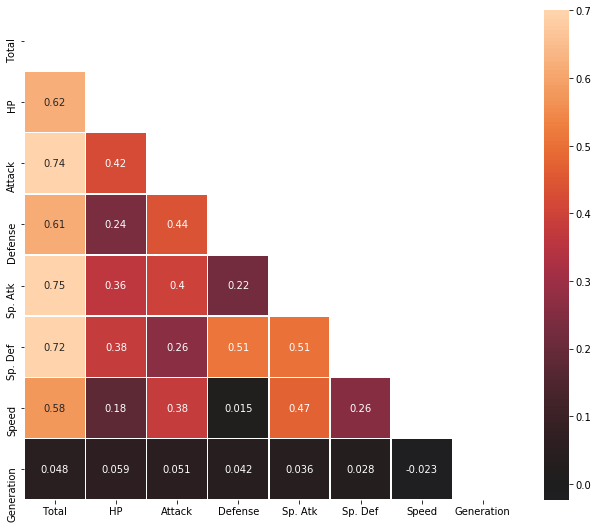

In [3]:
corr = df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(, annot =True )
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=0.7, center=0,
            square=True, linewidths=.5 ,annot =True)

## Группы покемонов ##

### По поколениям: ###

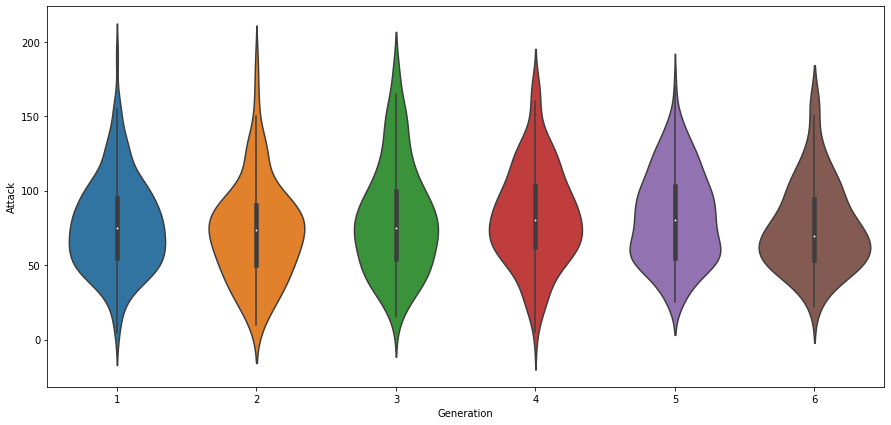

In [4]:
plt.figure(figsize = (15,7))
sns.violinplot(x = 'Generation', y='Attack', data = df)

### Легендарные и нет: ###

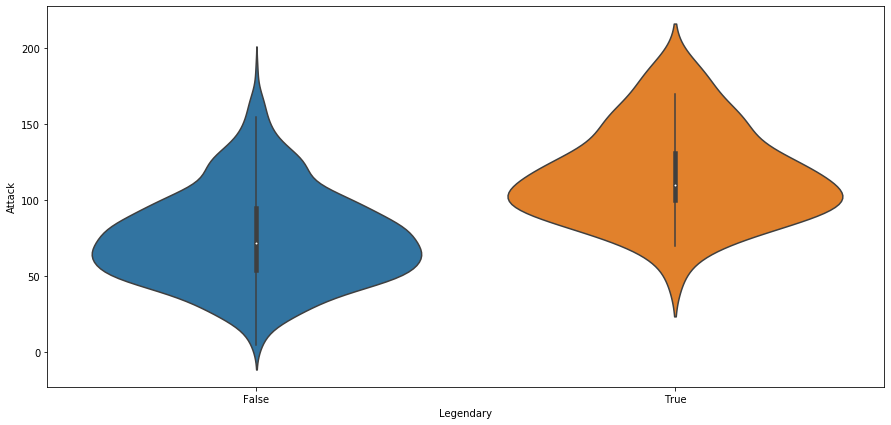

In [5]:
plt.figure(figsize = (15,7))
sns.violinplot(x = 'Legendary', y='Attack', data = df)

## Сравнение по типам: ##

*Для сравнения по типам нужно подготовить датасет:*

In [6]:
df_ex = df.explode("Type")
df_ex = df_ex.dropna(subset=["Type"])

#Считаю средние показатели на тип
df_per_Type = df_ex.groupby(by=['Type']).mean().reset_index().merge(df_ex.groupby(by=['Type']).nunique()['#'].reset_index(), how='inner', left_on='Type',right_on ='Type')
df_per_Type.rename(columns={'#_y':'Amount'}, inplace=True)
df_per_Type = df_per_Type.sort_values(by='Amount')

### Количество уникальных покемонов на тип: ###

Text(0.5, 2, 'Amount of unique Pokemons')

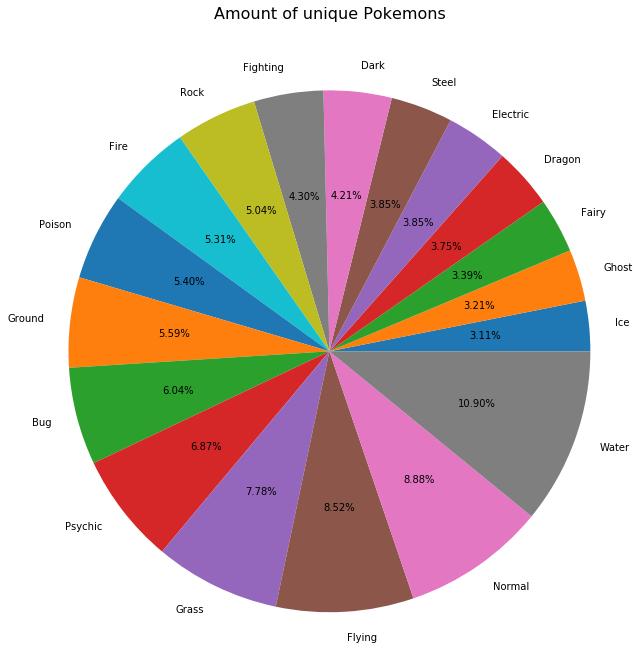

In [7]:
keys = df_per_Type['Type']
values = df_per_Type['Amount']
plt.pie(values, labels = keys, autopct='%1.2f%%', radius=3,startangle=0)
plt.title("Amount of unique Pokemons", fontsize=16, y=2)

### Показатели защиты и атаки на тип: ###

In [8]:
fig = px.scatter(df_per_Type, x="Defense", y="Attack", color="Type",
                 size='HP', title="Attack vs Deffence")

fig.show()

### Тип покемонов выше среднего по всем показателям: ###

In [9]:
df_per_Type[(df_per_Type["Attack"]>=df_per_Type["Attack"].mean()) \
            &(df_per_Type["Defense"]>=df_per_Type["Defense"].mean()) \
            &(df_per_Type["Sp. Atk"]>=df_per_Type["Sp. Atk"].mean()) \
            &(df_per_Type["Sp. Def"]>=df_per_Type["Sp. Def"].mean()) \
            &(df_per_Type["HP"]>=df_per_Type["HP"].mean()) \
            &(df_per_Type["Speed"]>=df_per_Type["Speed"].mean())]

,Type,#_x,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Amount
2,Dragon,477.32,541.76,82.9,105.76,86.62,97.44,86.9,82.14,3.98,0.32,41


![DragonUrl](https://i.imgur.com/nVTrsAg.gif "dragon")

### Покзатели по поколениям среди топовых типов: ###

In [10]:
top_fefence = list(df[df['Legendary'] == False].groupby(['Type 1'], as_index=False)[['Defense']].mean().nlargest(5,'Defense')['Type 1'])
top_atac = list(df[df['Legendary'] == False].groupby(['Type 1'], as_index=False)[['Attack']].mean().nlargest(5,'Attack')['Type 1'])

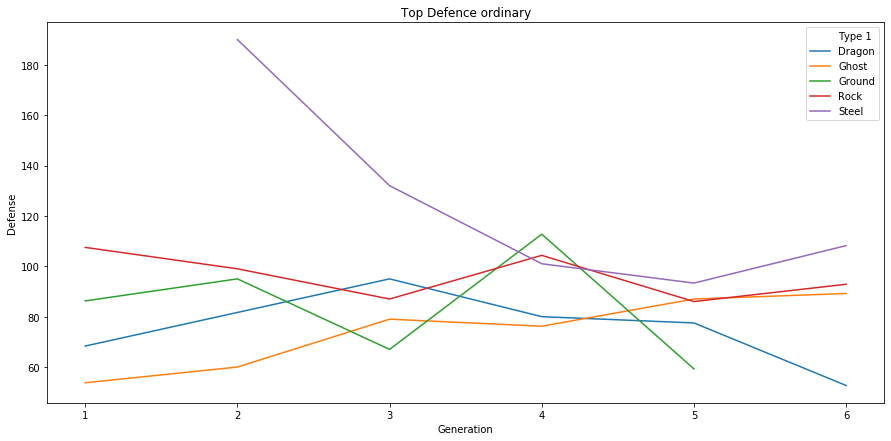

In [11]:
plt.figure(figsize = (15,7))
plt.title('Top Defence ordinary')
sns.lineplot(data = df[(df['Legendary'] == False)&(df['Type 1'].isin(top_fefence))].groupby(['Generation','Type 1'], as_index=False)[['Defense']].mean(), x='Generation', y='Defense', hue="Type 1")

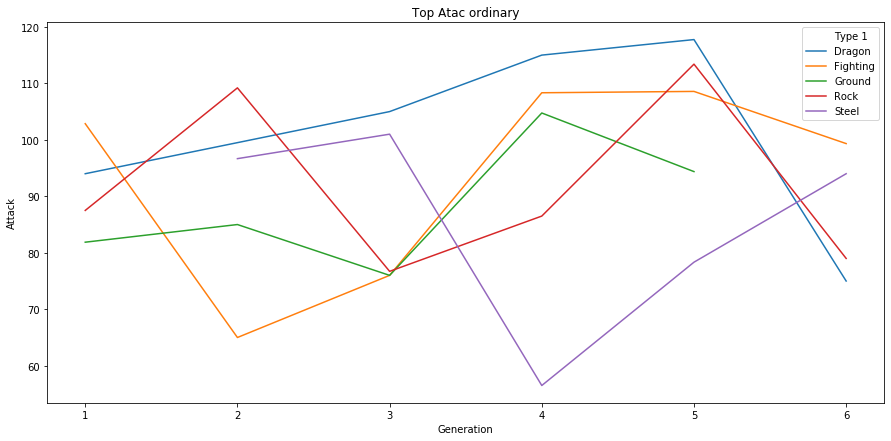

In [12]:
plt.figure(figsize = (15,7))
plt.title('Top Atac ordinary')
sns.lineplot(data = df[(df['Legendary'] == False)&(df['Type 1'].isin(top_atac))].groupby(['Generation','Type 1'], as_index=False)[['Attack']].mean(), x='Generation', y='Attack', hue="Type 1")